# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Pramudya Putra Pratama
- **Email:** mc129d5y1501@student.devacademy.id
- **ID Dicoding:** MC129D5Y1501

## Menentukan Pertanyaan Bisnis

- Bagaimana tren jumlah peminjam sepeda setiap harinya dalam rentang tertentu (hari / bulan & tahun)?
- Pada jam berapa peminjaman sepeda paling tinggi dan paling rendah dalam satu hari?
- Bagaimana perbedaan jumlah peminjaman sepeda di setiap musim? Apakah musim tertentu berpengaruh?
- Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?
- Apakah ada perbedaan pola peminjaman antara pengguna biasa dan pengguna terdaftar berdasarkan musim dan hari kerja?
- Bagaimana pola jumlah perbedaan ketika weekday/weekend dan juga hari libur nasional?
- Bagaimana pola peminjaman sepeda berdasarkan interval waktu tertentu (pagi, siang, sore, malam)?

## Import Semua Packages/Library yang Digunakan

In [1]:
# Import package/library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# load data day
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# load data hour
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- load data "day.csv" ke dalam dataframe "day_df"
- load data "hour.csv" ke dalam dataframe "hour_df"

### Assessing Data

**data day_df**

In [4]:
# check info day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# mengecek jumlah nilai yang kosong
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# describe data dari day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
# menghitung data yang terduplikasi dari day_df 
print("jumlah duplikasi data:", day_df.duplicated().sum())

jumlah duplikasi data: 0


**data hour_df**

In [8]:
# check info data hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
# mengecek jumlah nilai yang kosong
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
# describe data dari hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [11]:
# menghitung data yang terduplikasi dari hour_df 
print("Jumlah duplikasi data:", hour_df.duplicated().sum())

Jumlah duplikasi data: 0


**Insight:**
- mendapatkan informasi dari 2 dataframe: "day_df" dan "hour_df" => terdapat kesalahan pada tipe data dteday (objek harusnya datetime), tipe data int pada beberapa column seperti ('season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit') harus diganti tipe data string object supaya mudah dipahami oleh pengguna awam
- mendescribe informasi dari 2 dataframe: data masih dalam bentuk normaliasi yaitu temp, atemp, hum, windspeed. 
- menghitung data-null dari 2 dataframe: tidak ada data null value
- menghitung data yang terduplikasi dari 2 dataframe: tidak ada data yang terduplikasi

### Cleaning Data

In [12]:
### data day_df ###

In [13]:
# konversi dteday ke datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [14]:
# convert numeric cat to kategorikal object
categorical_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for column in categorical_cols:
  day_df[column] = day_df[column].astype(str)

In [15]:
# check data
day_df.info()
# data dteday akan menjadi datetime dan data beberapa column categorical diatas akan berubah menjadi string object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    object        
 4   mnth        731 non-null    object        
 5   holiday     731 non-null    object        
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    object        
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [16]:
# mengubah data kategorikal sesuai dengan numeric object pada readme
# (season / musim)
day_df['season'] = day_df['season'].replace({
    '1': 'Springer', 
    '2': 'Summer', 
    '3': 'Fall', 
    '4': 'Winter'
})

# (weekday / hari)
day_df['weekday'] = day_df['weekday'].replace({
    '0': 'Sunday',
    '1': 'Monday',
    '2': 'Tuesday',
    '3': 'Wednesday',
    '4': 'Thursday',
    '5': 'Friday',
    '6': 'Saturday'
})

# (tahun / year)
day_df['yr'] = day_df['yr'].replace({
    '0': '2011', 
    '1': '2012',
})
# (bulan / month)
month_mapping = {
    '1': 'January', '2': 'February', '3': 'March', '4': 'April', 
    '5': 'May', '6': 'June', '7': 'July', '8': 'August', 
    '9': 'September', '10': 'October', '11': 'November', '12': 'December'
}
day_df['mnth'] = day_df['mnth'].replace(month_mapping)

# (cuaca / weather)
day_df['weathersit'] = day_df['weathersit'].replace({
    '1': 'Clear/Few clouds', 
    '2': 'Mist/Cloudy', 
    '3': 'Light Snow/Light Rain', 
    '4': 'Heavy Rain/Snow/Fog'
})

# workingday dan holiday
day_df['workingday'] = day_df['workingday'].replace({'0': 'No', '1': 'Yes'})
day_df['holiday'] = day_df['holiday'].replace({'0': 'No', '1': 'Yes'})

In [17]:
# kembalikan data yang dinormalisasi menjadi bentuk asli menggunakan rate sesuai readme
day_df['temp'] = day_df['temp'] * 41
day_df['atemp'] = day_df['atemp'] * 50
day_df['hum'] = day_df['hum'] * 100
day_df['windspeed'] = day_df['windspeed'] * 67

In [18]:
# describe_data
day_df.describe()

,instant,dteday,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452


In [19]:
# sample data
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,January,No,Saturday,No,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Springer,2011,January,No,Sunday,No,Mist/Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Springer,2011,January,No,Monday,Yes,Clear/Few clouds,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Springer,2011,January,No,Tuesday,Yes,Clear/Few clouds,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Springer,2011,January,No,Wednesday,Yes,Clear/Few clouds,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,2011-01-06,Springer,2011,January,No,Thursday,Yes,Clear/Few clouds,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,2011-01-07,Springer,2011,January,No,Friday,Yes,Mist/Cloudy,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,2011-01-08,Springer,2011,January,No,Saturday,No,Mist/Cloudy,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,2011-01-09,Springer,2011,January,No,Sunday,No,Clear/Few clouds,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,2011-01-10,Springer,2011,January,No,Monday,Yes,Clear/Few clouds,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [20]:
### hour_df ###

In [21]:
# konversi dteday ke datetime
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [22]:
# convert numeric cat to kategorikal object
categorical_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for column in categorical_cols:
  hour_df[column] = hour_df[column].astype(str)

In [23]:
# check data
hour_df.info()
# data dteday akan menjadi datetime dan data beberapa column categorical diatas akan berubah menjadi string object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  object        
 4   mnth        17379 non-null  object        
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  object        
 7   weekday     17379 non-null  object        
 8   workingday  17379 non-null  object        
 9   weathersit  17379 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [24]:
# mengubah data kategorikal sesuai dengan numeric object pada readme
# (season / musim)
hour_df['season'] = hour_df['season'].replace({
    '1': 'Springer', 
    '2': 'Summer', 
    '3': 'Fall', 
    '4': 'Winter'
})

hour_df['weekday'] = hour_df['weekday'].replace({
    '0': 'Sunday',
    '1': 'Monday',
    '2': 'Tuesday',
    '3': 'Wednesday',
    '4': 'Thursday',
    '5': 'Friday',
    '6': 'Saturday'
})

# (tahun / year)
hour_df['yr'] = hour_df['yr'].replace({
    '0': '2011', 
    '1': '2012',
})
# (bulan / month)
month_mapping = {
    '1': 'January', '2': 'February', '3': 'March', '4': 'April', 
    '5': 'May', '6': 'June', '7': 'July', '8': 'August', 
    '9': 'September', '10': 'October', '11': 'November', '12': 'December'
}
hour_df['mnth'] = hour_df['mnth'].replace(month_mapping)

# (cuaca / weather)
hour_df['weathersit'] = hour_df['weathersit'].replace({
    '1': 'Clear/Few clouds', 
    '2': 'Mist/Cloudy', 
    '3': 'Light Snow/Light Rain', 
    '4': 'Heavy Rain/Snow/Fog'
})

# workingday dan holiday
hour_df['workingday'] = hour_df['workingday'].replace({'0': 'No', '1': 'Yes'})
hour_df['holiday'] = hour_df['holiday'].replace({'0': 'No', '1': 'Yes'})

In [25]:
# kembalikan data yang dinormalisasi menjadi bentuk asli menggunakan rate sesuai readme
hour_df['temp'] = hour_df['temp'] * 41
hour_df['atemp'] = hour_df['atemp'] * 50
hour_df['hum'] = hour_df['hum'] * 100
hour_df['windspeed'] = hour_df['windspeed'] * 67

In [26]:
# describe_data
hour_df.describe()

,instant,dteday,hr,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,11.546752,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,0.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,6.000000,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,12.000000,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,18.000000,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,23.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000
std,5017.0295,NaN,6.914405,7.894801,8.592511,19.292983,8.196795,49.305030,151.357286,181.387599


In [27]:
# sample data
hour_df.head(15)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,January,0,No,Saturday,No,Clear/Few clouds,9.84,14.395,81.0,0.0000,3,13,16
1,2,2011-01-01,Springer,2011,January,1,No,Saturday,No,Clear/Few clouds,9.02,13.635,80.0,0.0000,8,32,40
2,3,2011-01-01,Springer,2011,January,2,No,Saturday,No,Clear/Few clouds,9.02,13.635,80.0,0.0000,5,27,32
3,4,2011-01-01,Springer,2011,January,3,No,Saturday,No,Clear/Few clouds,9.84,14.395,75.0,0.0000,3,10,13
4,5,2011-01-01,Springer,2011,January,4,No,Saturday,No,Clear/Few clouds,9.84,14.395,75.0,0.0000,0,1,1
5,6,2011-01-01,Springer,2011,January,5,No,Saturday,No,Mist/Cloudy,9.84,12.880,75.0,6.0032,0,1,1
6,7,2011-01-01,Springer,2011,January,6,No,Saturday,No,Clear/Few clouds,9.02,13.635,80.0,0.0000,2,0,2
7,8,2011-01-01,Springer,2011,January,7,No,Saturday,No,Clear/Few clouds,8.20,12.880,86.0,0.0000,1,2,3
8,9,2011-01-01,Springer,2011,January,8,No,Saturday,No,Clear/Few clouds,9.84,14.395,75.0,0.0000,1,7,8
9,10,2011-01-01,Springer,2011,January,9,No,Saturday,No,Clear/Few clouds,13.12,17.425,76.0,0.0000,8,6,14


In [28]:
# save final data
day_df.to_csv("day_df_final.csv", index=False)

In [29]:
# save final data
hour_df.to_csv("hour_df_final.csv", index=False)

**Insight:**
- merubah tipe data dteday yang awalnya object menjadi datetime 
- merubah tipe data beberapa column seperti ('season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit') awalnya integer menjadi string object
- merubah data kategorikal diatas menjadi object string aslinya menggunakan kamus pada readme.
- menormalisasi beberapa data kategori seperti temp, attemp, hum, windspeed menggunakan parameter value dari readme

## Exploratory Data Analysis (EDA)

### Explore ...

#### explore day_df

In [30]:
# explore day_df
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,January,No,Saturday,Yes,Clear/Few clouds,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [31]:
# sample day_df
day_df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
683,684,2012-11-14,Winter,2012,November,No,Wednesday,Yes,Clear/Few clouds,11.855847,14.07815,55.2083,13.374875,373,5122,5495
635,636,2012-09-27,Winter,2012,September,No,Thursday,Yes,Mist/Cloudy,26.650000,30.39875,69.0833,9.000914,751,6642,7393
721,722,2012-12-22,Springer,2012,December,No,Saturday,No,Clear/Few clouds,10.899153,11.80565,44.1250,27.292182,205,1544,1749
655,656,2012-10-17,Winter,2012,October,No,Wednesday,Yes,Clear/Few clouds,18.689153,22.50540,69.2917,6.791857,979,6482,7461
565,566,2012-07-19,Fall,2012,July,No,Thursday,Yes,Clear/Few clouds,31.570000,35.73210,60.0417,11.083743,888,5703,6591
480,481,2012-04-25,Summer,2012,April,No,Wednesday,Yes,Clear/Few clouds,19.543347,23.51585,42.7917,7.959064,655,5541,6196
58,59,2011-02-28,Springer,2011,February,No,Monday,Yes,Mist/Cloudy,16.698193,20.00590,87.6364,19.408962,81,1365,1446
494,495,2012-05-09,Summer,2012,May,No,Wednesday,Yes,Mist/Cloudy,23.575000,27.65125,74.4167,14.499604,620,4097,4717
676,677,2012-11-07,Winter,2012,November,No,Wednesday,Yes,Mist/Cloudy,12.129153,13.73105,54.7500,20.375236,326,4709,5035
662,663,2012-10-24,Winter,2012,October,No,Wednesday,Yes,Clear/Few clouds,24.087500,27.93605,63.6250,4.876206,795,6898,7693


In [32]:
# memeriksa keunikan
day_df.instant.is_unique

True

<Axes: >

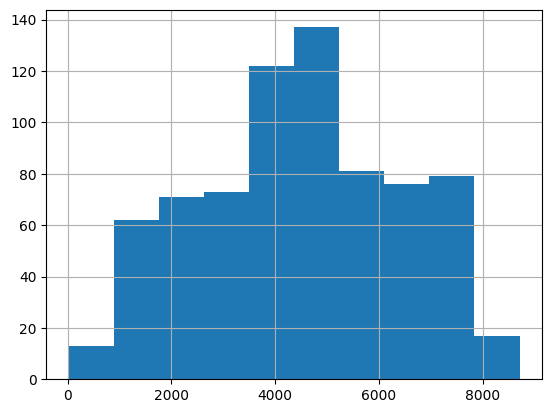

In [33]:
# menampilkan histogram jumlah perental
day_df.cnt.hist()

In [34]:
# menghitung hari pada setiap seasons
day_df.groupby(by="season").instant.count()

season
Fall        188
Springer    181
Summer      184
Winter      178
Name: instant, dtype: int64

In [35]:
# menghitung total, maksimum, minimum, rata-rata, dan standard deviasi jumlah peminjaman sepeda untuk setiap season
day_df.groupby(by="season").agg({
    "cnt" : ["sum", "max", "min", "mean", "std"]
})

cnt                                      
              sum   max   min         mean          std
season                                                 
Fall      1061129  8714  1115  5644.303191  1459.800381
Springer   471348  7836   431  2604.132597  1399.942119
Summer     918589  8362   795  4992.331522  1695.977235
Winter     841613  8555    22  4728.162921  1699.615261

In [36]:
# mengkomparasikan season terhadap jumlah peminjam dan kualitas udara
day_df.groupby(by="season").agg({
    "cnt": "sum",
    "temp": ["max", "min", "mean", "std"],
    "hum": ["max", "min", "mean", "std"],
    "windspeed": ["max", "min", "mean", "std"]
})

cnt       temp                                      hum  \
              sum        max        min       mean       std      max   
season                                                                  
Fall      1061129  35.328347  19.235847  28.958682  2.904749  93.9565   
Springer   471348  23.472500   2.424346  12.207650  4.212136  94.8261   
Summer     918589  33.141653  10.374763  22.320611  5.028649  92.2500   
Winter     841613  26.957500   9.054153  17.339148  4.421179  97.2500   

                                         windspeed                       \
              min       mean        std        max       min       mean   
season                                                                    
Fall      36.0000  63.348206  11.934864  25.166339  4.292744  11.530366   
Springer   0.0000  58.290291  15.187972  34.000021  3.042356  14.373984   
Summer    25.4167  62.694833  15.284075  26.000489  4.417256  13.634978   
Winter    33.3478  66.871917  13.124796  28.292425  1.500244  11.523637   

                    
               std  
season              
Fall      3.988275  
Springer  5.791401  
Summer    4.799113  
Winter    5.464839

In [37]:
# jumlah peminjam sepeda berdasarkan bulan 2011 dan 2012
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
 'July', 'August', 'September', 'October', 'November', 'December']

monthly_stats = day_df.groupby(by="mnth").agg({
    "cnt": ["sum", "max", "min", "mean", "std"] # menampilkan jumlah total peminjam, max, min, rata-rata dan standard deviasi
}).rename_axis("Month")

monthly_stats

cnt                                      
              sum   max   min         mean          std
Month                                                  
April      269094  7460   795  4484.900000  1776.160778
August     351194  7865  1115  5664.419355  1494.516146
December   211036  6606   441  3403.806452  1549.639353
February   151352  5062  1005  2655.298246  1145.313307
January    134933  4521   431  2176.338710  1161.674370
July       344948  8173  3285  5563.677419  1273.751871
June       346342  8120  3767  5772.366667  1240.400031
March      228920  8362   605  3692.258065  1899.301812
May        331686  8294  2633  5349.774194  1298.711561
November   254831  6852  1495  4247.183333  1285.712709
October    322352  8156    22  5199.225806  1988.392517
September  345991  8714  1842  5766.516667  1810.130649

In [38]:
# jumlah peminjam sepeda berdasarkan bulan 2011

filtered_day_df = day_df[day_df["yr"] == "2011"]

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
 'July', 'August', 'September', 'October', 'November', 'December']

monthly_stats = filtered_day_df.groupby(by="mnth").agg({
    "cnt": ["sum", "max", "min", "mean", "std"] # menampilkan jumlah total peminjam, max, min, rata-rata dan standard deviasi
}).rename_axis("Month")

monthly_stats

cnt                                      
              sum   max   min         mean          std
Month                                                  
April       94870  5312   795  3162.333333  1042.093593
August     136691  5895  1115  4409.387097   809.852401
December    87323  3940   705  2816.870968   958.763187
February    48215  2927  1005  1721.964286   398.508839
January     38189  1985   431  1231.903226   372.432665
July       141341  6043  3285  4559.387097   680.090762
June       143512  5515  3767  4783.733333   444.447812
March       64045  3239   605  2065.967742   550.971716
May        135821  5805  2633  4381.322581   572.927883
November   102167  4486  1495  3405.566667   788.249290
October    123511  5511   627  3984.225806  1103.481844
September  127418  5423  1842  4247.266667   965.377251

In [39]:
# jumlah peminjam sepeda berdasarkan bulan 2012

filtered_day_df = day_df[day_df["yr"] == "2012"]

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
 'July', 'August', 'September', 'October', 'November', 'December']

monthly_stats = filtered_day_df.groupby(by="mnth").agg({
    "cnt": ["sum", "max", "min", "mean", "std"] # menampilkan jumlah total peminjam, max, min, rata-rata dan standard deviasi
}).rename_axis("Month")

monthly_stats

cnt                                      
              sum   max   min         mean          std
Month                                                  
April      174224  7460  1027  5807.466667  1308.938916
August     214503  7865  4549  6919.451613   794.059017
December   123713  6606   441  3990.741935  1803.227864
February   103137  5062  1529  3556.448276   870.724640
January     96744  4521  1301  3120.774194   872.852134
July       203607  8173  4459  6567.967742   867.183736
June       202830  8120  4127  6761.000000   954.204995
March      164875  8362  3194  5318.548387  1251.162682
May        195865  8294  2843  6318.225806  1078.403997
November   152664  6852  2277  5088.800000  1129.731198
October    198841  8156    22  6414.225806  1941.819400
September  218573  8714  4073  7285.766667   979.160925

In [40]:
# menghitung jumlah peminjam saat working day atau bukan
day_df.groupby('workingday').agg({
    "instant" : "count", # total hari
    "cnt" : ["sum", "max", "min", "mean"] # analisis total peminjam
})

instant      cnt                        
             count      sum   max  min         mean
workingday                                         
No             231  1000269  8714  605  4330.168831
Yes            500  2292410  8362   22  4584.820000

In [41]:
# menghitung jumlah peminjam saat hari libur (holiday)
day_df.groupby('holiday').agg({
    "instant" : "count", # total hari
    "cnt" : ["sum", "max", "min", "mean"] # analisis total peminjam
})

instant      cnt                         
          count      sum   max   min         mean
holiday                                          
No          710  3214244  8714    22  4527.104225
Yes          21    78435  7403  1000  3735.000000

In [42]:
# menghitung jumlah peminjam di setiap harinya (weekday)
day_df.groupby('weekday').agg({
    "cnt" : ["sum", "max", "min", "mean"] # analisis total peminjam
})

cnt                         
              sum   max   min         mean
weekday                                   
Friday     487790  8362  1167  4690.288462
Monday     455503  7525    22  4338.123810
Saturday   477807  8714   627  4550.542857
Sunday     444027  8227   605  4228.828571
Thursday   485395  7804   431  4667.259615
Tuesday    469109  7767   683  4510.663462
Wednesday  473048  8173   441  4548.538462

In [43]:
# total jumlah pinjaman antara data pengguna biasa, dan pengguna terdaftar

day_df.agg({
    "cnt": ["sum", "mean"],
    "casual": ["sum", "mean"],
    "registered": ["sum", "mean"]
}).transpose().rename(columns={"sum": "Total Users", "mean": "Average Users / Day"})

,Total Users,Average Users / Day
cnt,3292679.0,4504.348837
casual,620017.0,848.176471
registered,2672662.0,3656.172367


In [44]:
# menghitung jumlah pinjaman antara data pengguna biasa, dan pengguna terdaftar berdasarkan musim dan jam kerja
day_df.groupby(["season", "workingday"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).reset_index()

,season,workingday,casual,registered,cnt
0,Fall,No,107345,204711,312056
1,Fall,Yes,118746,630327,749073
2,Springer,No,32400,105283,137683
3,Springer,Yes,28222,305443,333665
4,Summer,No,105693,182283,287976
5,Summer,Yes,97829,532784,630613
6,Winter,No,71294,191260,262554
7,Winter,Yes,58488,520571,579059


#### explore hour_df

In [45]:
# describe data hour_df
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,12,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,July,NaN,No,Saturday,Yes,Clear/Few clouds,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


In [46]:
# mengambil sample
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
4384,4385,2011-07-06,Fall,2011,July,14,No,Wednesday,Yes,Clear/Few clouds,31.16,36.365,66.0,19.0012,50,113,163
12707,12708,2012-06-18,Summer,2012,June,16,No,Monday,Yes,Mist/Cloudy,24.60,29.545,73.0,12.9980,53,279,332
2366,2367,2011-04-13,Summer,2011,April,12,No,Wednesday,Yes,Light Snow/Light Rain,17.22,21.210,82.0,16.9979,12,83,95
10119,10120,2012-03-02,Springer,2012,March,17,No,Friday,Yes,Light Snow/Light Rain,14.76,17.425,81.0,15.0013,5,123,128
3595,3596,2011-06-03,Summer,2011,June,17,No,Friday,Yes,Clear/Few clouds,29.52,31.820,25.0,19.0012,73,485,558


In [47]:
# memeriksa keunikan
hour_df.instant.is_unique

True

In [48]:
# menghitung setiap jam nya, jumlah rekap weathersit (cuaca)
hour_df.groupby(by="weathersit").instant.count()

weathersit
Clear/Few clouds         11413
Heavy Rain/Snow/Fog          3
Light Snow/Light Rain     1419
Mist/Cloudy               4544
Name: instant, dtype: int64

In [49]:
# menghitung jumlah, min, max, mean, dan standar deviasi peminjam pada setiap cuaca (weather)
hour_df.groupby(by="weathersit").agg({
    "cnt" : ["sum", "min", "max", "mean", "std"],
})

cnt                                 
                           sum min  max        mean         std
weathersit                                                     
Clear/Few clouds       2338173   1  977  204.869272  189.487773
Heavy Rain/Snow/Fog        223  23  164   74.333333   77.925178
Light Snow/Light Rain   158331   1  891  111.579281  133.781045
Mist/Cloudy             795952   1  957  175.165493  165.431589

In [50]:
# menghitung jumlah, mean, min, max, dan standard deviasi peminjam berdasarkan jam (hour) 
hour_df.groupby("hr").agg({
    "cnt": ["sum", "min", "max", "mean", "std"]
})

cnt                                 
       sum min  max        mean         std
hr                                         
0    39130   2  283   53.898072   42.307910
1    24164   1  168   33.375691   33.538727
2    16352   1  132   22.869930   26.578642
3     8174   1   79   11.727403   13.239190
4     4428   1   28    6.352941    4.143818
5    14261   1   66   19.889819   13.200765
6    55132   1  213   76.044138   55.084348
7   154171   1  596  212.064649  161.441936
8   261001   5  839  359.011004  235.189285
9   159438  14  426  219.309491   93.703458
10  126257   8  539  173.668501  102.205413
11  151320  10  663  208.143054  127.495536
12  184414   3  776  253.315934  145.081134
13  184919  11  760  253.661180  148.107657
14  175652  12  750  240.949246  147.271574
15  183149   7  750  251.233196  144.632541
16  227748  11  783  311.983562  148.682618
17  336860  15  976  461.452055  232.656611
18  309772  23  977  425.510989  224.639304
19  226789  11  743  311.523352  161.050359
20  164550  11  567  226.030220  119.670164
21  125445   6  584  172.314560   89.788893
22   95612   9  502  131.335165   69.937782
23   63941   2  256   87.831044   50.846889

**Insight:**
1. mengambil sampel untuk day_df dan hour_df
2. memastikan instant (id) unique
3. menampilkan histogram jumlah perental harian
4. menampilkan jumlah hari dikelompokkan berdasarkan season pada day_df
5. menghitung total, maksimum, minimum, rata-rata, dan standard deviasi jumlah peminjaman sepeda untuk setiap season pada day_df
6. mengkomparasikan season terhadap jumlah peminjam dan kualitas Udara (temperature, humidity, windspeed) pada day_df
7. menghitung total, maksimum, minimum, rata-rata, dan standard deviasi jumlah peminjam sepeda berdasarkan bulan dan tahunnya.
8. menghitung jumlah peminjam saat working day atau bukan.
9. menghitung total, maksimum, minimum, rata-rata, dan standard deviasi jumlah peminjam sepeda di hari libur nasional dan tidak.
10. menghitung trend peminjam di setiap harinya semisal hari senin, selasa, rabu, dan seterusnya.
11. menghitung jumlah dan rata-rata peminjam biasa atau member (terdaftar)
12. menghitung jumlah pinjaman antara data pengguna biasa dan pengguna terdaftar berdasarkan musim dan jam kerja/bukan.

**khusus hour_df**
1. menghitung jumlah setiap jam nya untuk rekap weathersit (cuaca)
3. menghitung jumlah, min, max, mean, dan standar deviasi peminjam pada setiap cuaca (weather).
4. menghitung jumlah, mean, min, max, dan standard deviasi peminjam berdasarkan jam (hour)

## Visualization & Explanatory Analysis

#### Mengambil Sample day_df dan hour_df

In [51]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
177,178,2011-06-27,Fall,2011,June,No,Monday,Yes,Mist/Cloudy,27.982500,31.85020,65.8333,7.208396,854,3854,4708
536,537,2012-06-20,Summer,2012,June,No,Wednesday,Yes,Clear/Few clouds,32.082500,36.04875,59.2083,7.625404,872,5339,6211
283,284,2011-10-11,Winter,2011,October,No,Tuesday,Yes,Mist/Cloudy,23.233347,27.30480,80.8750,9.583814,667,3896,4563
682,683,2012-11-13,Winter,2012,November,No,Tuesday,Yes,Mist/Cloudy,14.076653,16.16125,66.2917,22.917082,327,3767,4094
662,663,2012-10-24,Winter,2012,October,No,Wednesday,Yes,Clear/Few clouds,24.087500,27.93605,63.6250,4.876206,795,6898,7693


In [52]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
13108,13109,2012-07-05,Fall,2012,July,9,No,Thursday,Yes,Clear/Few clouds,34.44,39.395,49.0,19.9995,47,246,293
12081,12082,2012-05-23,Summer,2012,May,14,No,Wednesday,Yes,Clear/Few clouds,27.88,31.820,65.0,8.9981,67,181,248
8764,8765,2012-01-06,Springer,2012,January,0,No,Friday,Yes,Clear/Few clouds,9.02,12.880,75.0,6.0032,1,24,25
6154,6155,2011-09-19,Fall,2011,September,0,No,Monday,Yes,Mist/Cloudy,21.32,25.000,72.0,11.0014,14,23,37
10773,10774,2012-03-30,Summer,2012,March,0,No,Friday,Yes,Clear/Few clouds,16.40,20.455,47.0,19.9995,10,49,59


### Pertanyaan 1: Bagaimana tren jumlah peminjam sepeda setiap harinya dalam rentang tertentu (hari / bulan & tahun)?

**analisa distribusi harian**

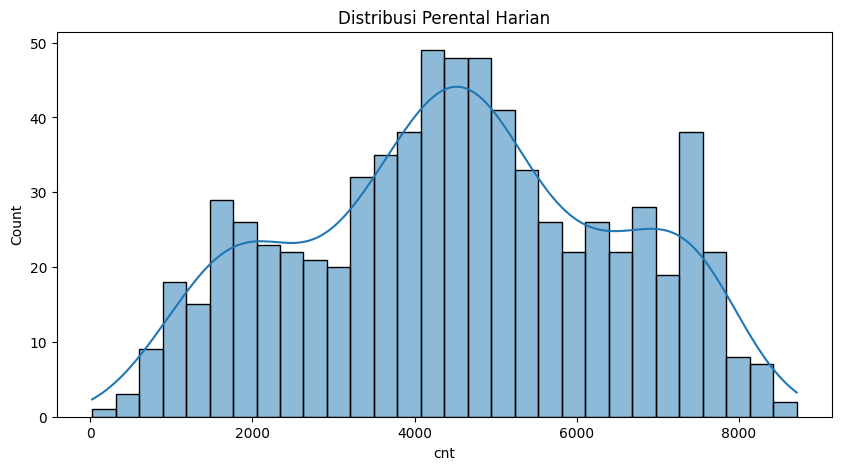

In [53]:
# menganalisa distribusi peminjam harian
plt.figure(figsize=(10, 5))
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title('Distribusi Perental Harian')
plt.show()

**analisa jumlah peminjaman dalam range hari**

In [54]:
# Input tanggal mulai dan selesai
start_date = "2012-5-1"
end_date = "2012-5-31"

# Konversi ke format datetime
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Filter data berdasarkan rentang tanggal
filtered_df = day_df[(day_df["dteday"] >= start_date) & (day_df["dteday"] <= end_date)].copy()

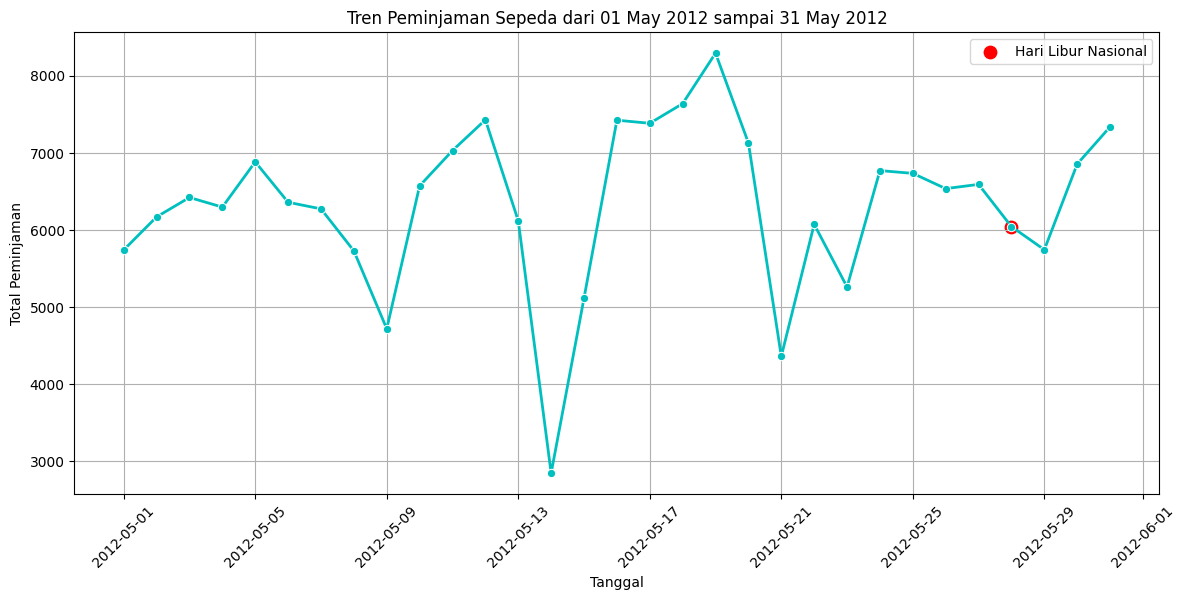

In [55]:
# Agregasi jumlah peminjaman berdasarkan hari
daily_rentals = filtered_df.groupby("dteday", as_index=False).agg({"cnt": "sum", "holiday": "first"})

# Plot hasilnya menggunakan line chart
plt.figure(figsize=(14, 6))
sns.lineplot(x="dteday", y="cnt", data=daily_rentals, marker="o", linewidth=2.0, color="c")

# Tambahkan titik merah untuk hari non-kerja (workingday == 0)
non_working_days = daily_rentals[daily_rentals["holiday"] == "Yes"]
plt.scatter(non_working_days["dteday"], non_working_days["cnt"], color="red", s=80, label="Hari Libur Nasional")

# Tambahkan keterangan
plt.xlabel("Tanggal")
plt.ylabel("Total Peminjaman")
plt.title(f"Tren Peminjaman Sepeda dari {start_date.strftime('%d %B %Y')} sampai {end_date.strftime('%d %B %Y')}")

plt.xticks(rotation=45)  # Supaya label tanggal tidak berdesakan
plt.grid(True)  # Menambahkan grid agar lebih jelas
plt.legend()  # Menampilkan legenda untuk titik merah

plt.show()


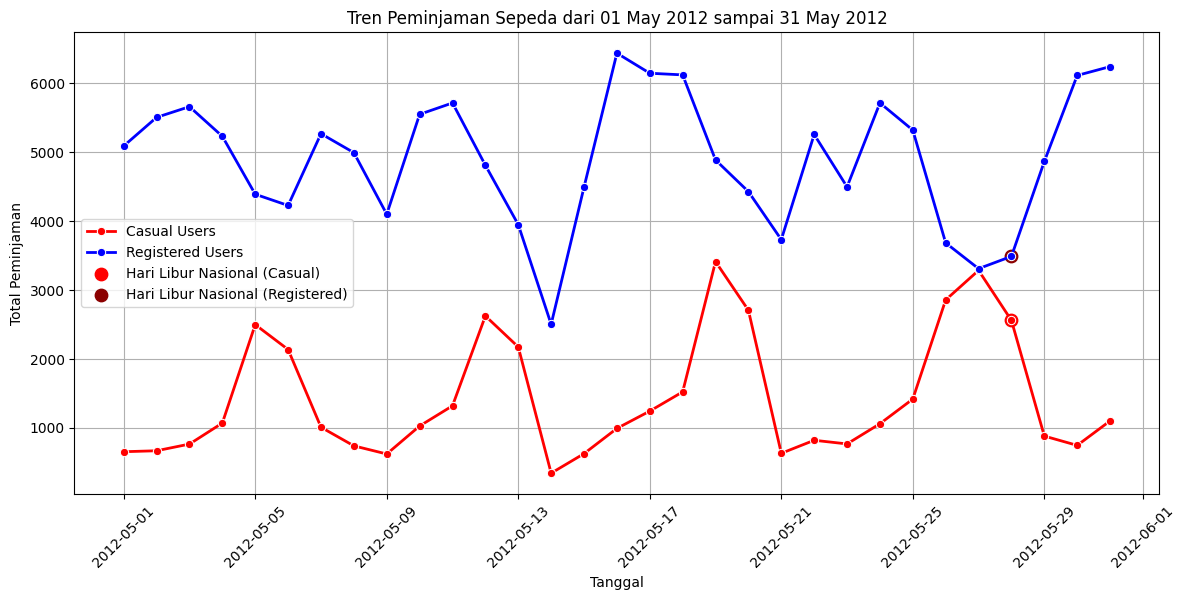

In [56]:
# Agregasi jumlah peminjaman berdasarkan hari
daily_rentals = filtered_df.groupby("dteday", as_index=False).agg({
    "casual": "sum",
    "registered": "sum",
    "holiday": "first"
})

# Membuat menggunakan line chart
plt.figure(figsize=(14, 6))
sns.lineplot(x="dteday", y="casual", data=daily_rentals, marker="o", linewidth=2.0, color="r", label="Casual Users")
sns.lineplot(x="dteday", y="registered", data=daily_rentals, marker="o", linewidth=2.0, color="b", label="Registered Users")

# Menambahkan titik merah untuk hari libur nasional
non_working_days = daily_rentals[daily_rentals["holiday"] == "Yes"]
plt.scatter(non_working_days["dteday"], non_working_days["casual"], color="red", s=80, label="Hari Libur Nasional (Casual)")
plt.scatter(non_working_days["dteday"], non_working_days["registered"], color="darkred", s=80, label="Hari Libur Nasional (Registered)")

# Menambah keterangan label x sebagai tanggal dan y adalah total peminjaman
plt.xlabel("Tanggal")
plt.ylabel("Total Peminjaman")
plt.title(f"Tren Peminjaman Sepeda dari {start_date.strftime('%d %B %Y')} sampai {end_date.strftime('%d %B %Y')}")

plt.xticks(rotation=45)
plt.grid(True)
plt.legend() 

plt.show()

**analisa jumlah peminjaman dalam bulan dan tahun**

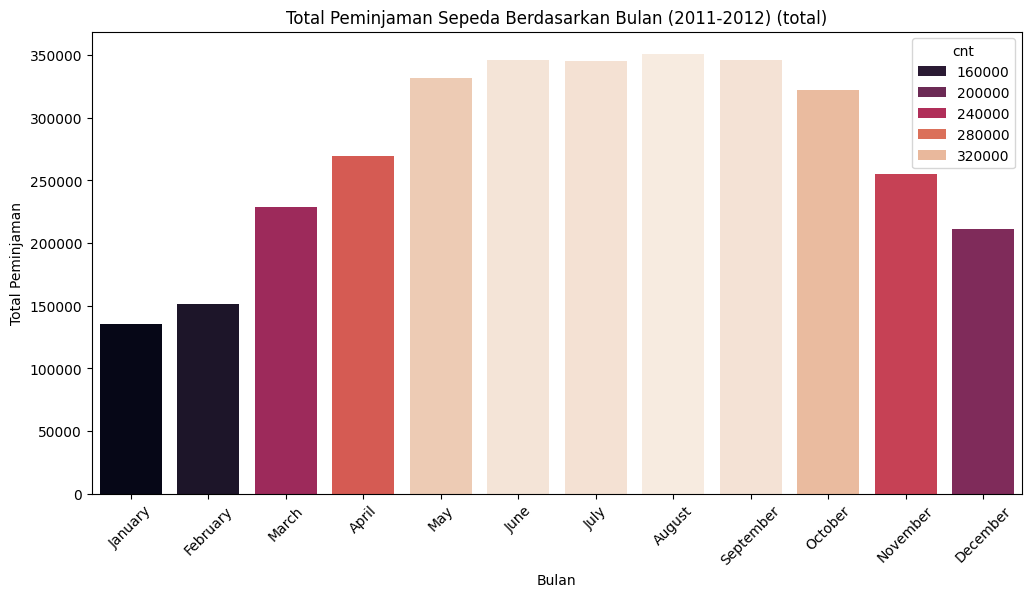

In [57]:
# menampilkan data peminjam sepeda berdasarkan bulan pada tahun 2011 dan 2012

# Agregasi jumlah peminjaman berdasarkan bulan
monthly_rentals = day_df.groupby(day_df["dteday"].dt.strftime("%B"))["cnt"].sum().reset_index()

# Urutan Bulan
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# mengurutkan bulan dengan benar
monthly_rentals["dteday"] = pd.Categorical(monthly_rentals["dteday"], categories=month_order, ordered=True)
monthly_rentals = monthly_rentals.sort_values("dteday")

# Plot hasilnya
plt.figure(figsize=(12, 6))
sns.barplot(x="dteday", y="cnt", data=monthly_rentals, hue="cnt", palette="rocket")

plt.xlabel("Bulan")
plt.ylabel("Total Peminjaman")
plt.title("Total Peminjaman Sepeda Berdasarkan Bulan (2011-2012) (total)")

plt.xticks(rotation=45)  # Supaya label bulan tidak berdesakan
plt.show()

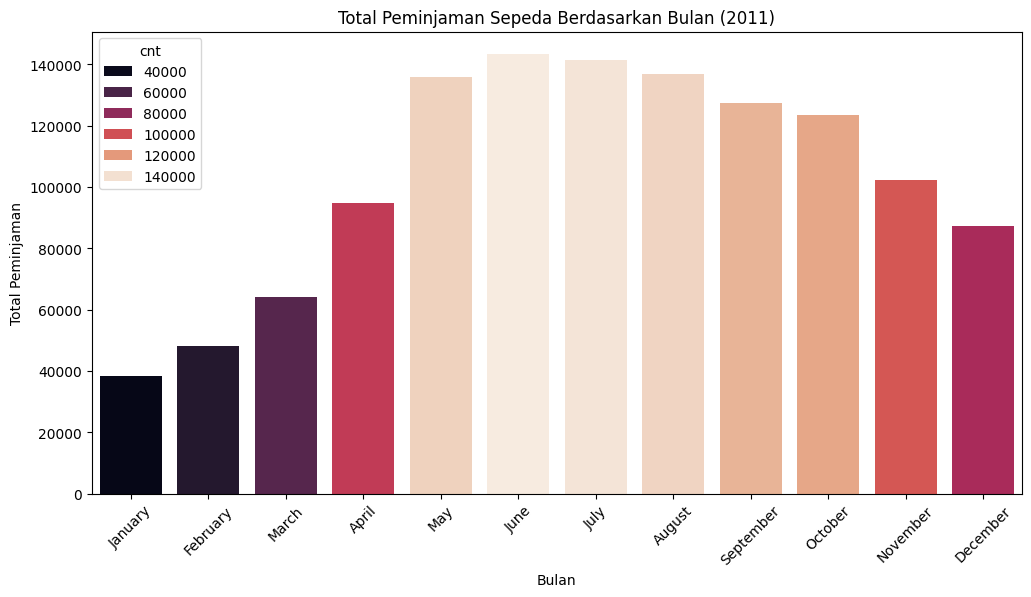

In [58]:
# menampilkan data peminjam sepeda berdasarkan bulan di 2011
tahun = '2011'
day_df_filtered = day_df[day_df['yr'] == tahun]

# Agregasi jumlah peminjaman berdasarkan bulan
monthly_rentals = day_df.groupby(day_df_filtered["dteday"].dt.strftime("%B"))["cnt"].sum().reset_index()

# Urutan Bulan
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# mengurutkan bulan dengan benar
monthly_rentals["dteday"] = pd.Categorical(monthly_rentals["dteday"], categories=month_order, ordered=True)
monthly_rentals = monthly_rentals.sort_values("dteday")

# Plot hasilnya
plt.figure(figsize=(12, 6))
sns.barplot(x="dteday", y="cnt", data=monthly_rentals, hue="cnt", palette="rocket")

plt.xlabel("Bulan")
plt.ylabel("Total Peminjaman")
plt.title("Total Peminjaman Sepeda Berdasarkan Bulan (2011)")

plt.xticks(rotation=45)  # Supaya label bulan tidak berdesakan
plt.show()

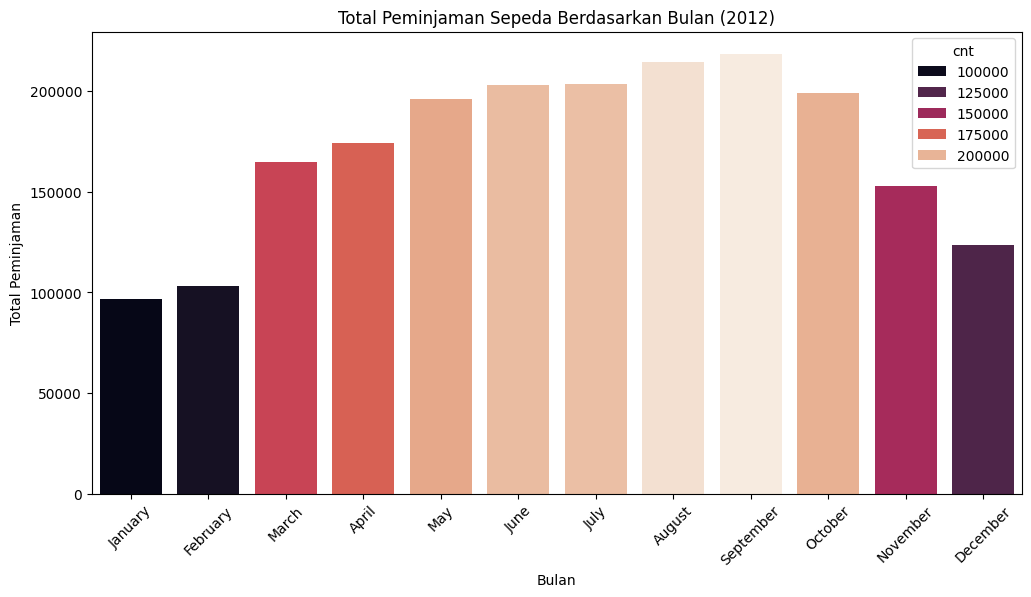

In [59]:
# menampilkan data peminjam sepeda berdasarkan bulan di 2012
tahun = '2012'
day_df_filtered = day_df[day_df['yr'] == tahun]

# Agregasi jumlah peminjaman berdasarkan bulan
monthly_rentals = day_df.groupby(day_df_filtered["dteday"].dt.strftime("%B"))["cnt"].sum().reset_index()

# Urutan Bulan
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# mengurutkan bulan dengan benar
monthly_rentals["dteday"] = pd.Categorical(monthly_rentals["dteday"], categories=month_order, ordered=True)
monthly_rentals = monthly_rentals.sort_values("dteday")

# Plot hasilnya
plt.figure(figsize=(12, 6))
sns.barplot(x="dteday", y="cnt", data=monthly_rentals, hue="cnt", palette="rocket")

plt.xlabel("Bulan")
plt.ylabel("Total Peminjaman")
plt.title("Total Peminjaman Sepeda Berdasarkan Bulan (2012)")

plt.xticks(rotation=45)  # Supaya label bulan tidak berdesakan
plt.show()

**analisa jumlah peminjaman dalam bulan dan tahun menggunakan range**

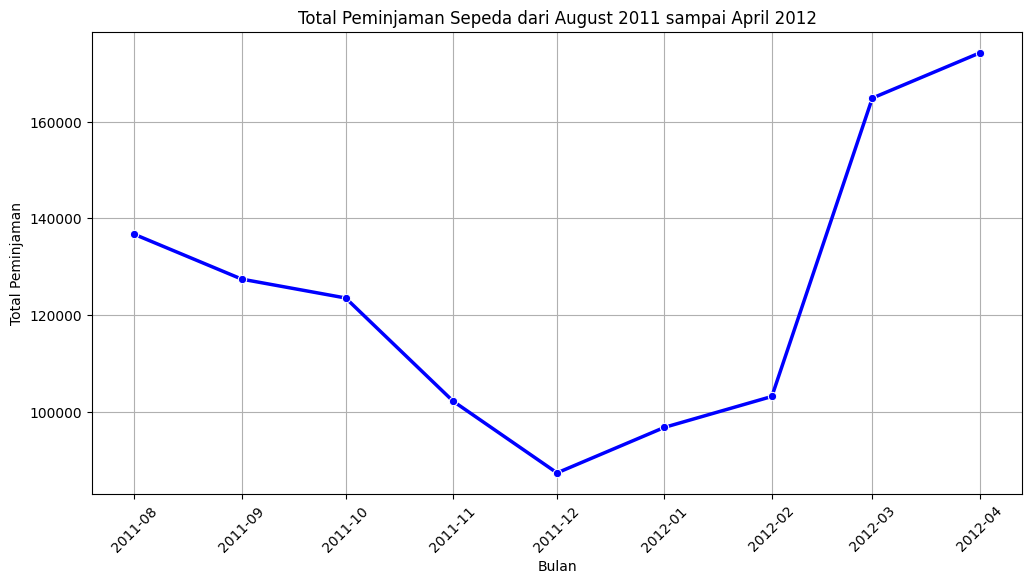

In [60]:
# range waktu

# Pastikan dteday dalam format datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

# Input bulan dan tahun awal serta akhir (tanpa tanggal)
start_month, start_year = "August", 2011
end_month, end_year = "April", 2012

# Konversi ke format datetime untuk filtering
start_date = pd.to_datetime(f"{start_year}-{start_month}-01", format="%Y-%B-%d")
end_date = pd.to_datetime(f"{end_year}-{end_month}-01", format="%Y-%B-%d") + pd.offsets.MonthEnd(0)

# Filter data berdasarkan bulan dan tahun yang dipilih
filtered_df = day_df[(day_df["dteday"] >= start_date) & (day_df["dteday"] <= end_date)].copy()

# Membuat kolom "month_year" dalam format "MMM YYYY" (misal: "Apr 2011")
filtered_df.loc[:, "month_year"] = filtered_df["dteday"].dt.strftime("%b %Y")

# Agregasi jumlah peminjaman berdasarkan bulan dan tahun
monthly_rentals = filtered_df.groupby("month_year", as_index=False)["cnt"].sum()

# Urutkan berdasarkan waktu
monthly_rentals["month_year"] = pd.to_datetime(monthly_rentals["month_year"], format="%b %Y")
monthly_rentals = monthly_rentals.sort_values("month_year")

# Plot hasilnya
plt.figure(figsize=(12, 6))
# sns.barplot(x="month_year", y="cnt", data=monthly_rentals, hue="month_year", palette="mako")
sns.lineplot(x="month_year", y="cnt", data=monthly_rentals, marker="o", linewidth=2.5, color="b")

plt.xlabel("Bulan")
plt.ylabel("Total Peminjaman")
plt.title(f"Total Peminjaman Sepeda dari {start_month} {start_year} sampai {end_month} {end_year}")

plt.xticks(rotation=45)  # Supaya label bulan tidak berdesakan
plt.grid(True)
plt.show()

### Pertanyaan 2: Pada jam berapa peminjaman sepeda paling tinggi dan paling rendah dalam satu hari?

**mengurutkan best hour dan worst hour peminjam**

In [61]:
# Menghitung total peminjam berdasarkan jam
sum_sharing_hour_df = hour_df.groupby("hr").cnt.sum().reset_index()

# Konversi 'hr' menjadi string agar dianggap kategori
sum_sharing_hour_df['hr'] = sum_sharing_hour_df['hr'].astype(str)

# Urutkan dari terkecil ke terbesar
sum_sharing_hour_df = sum_sharing_hour_df.sort_values(by="cnt", ascending=False)
sum_sharing_hour_df.head(24)

,hr,cnt
17,17,336860
18,18,309772
8,8,261001
16,16,227748
19,19,226789
13,13,184919
12,12,184414
15,15,183149
14,14,175652
20,20,164550


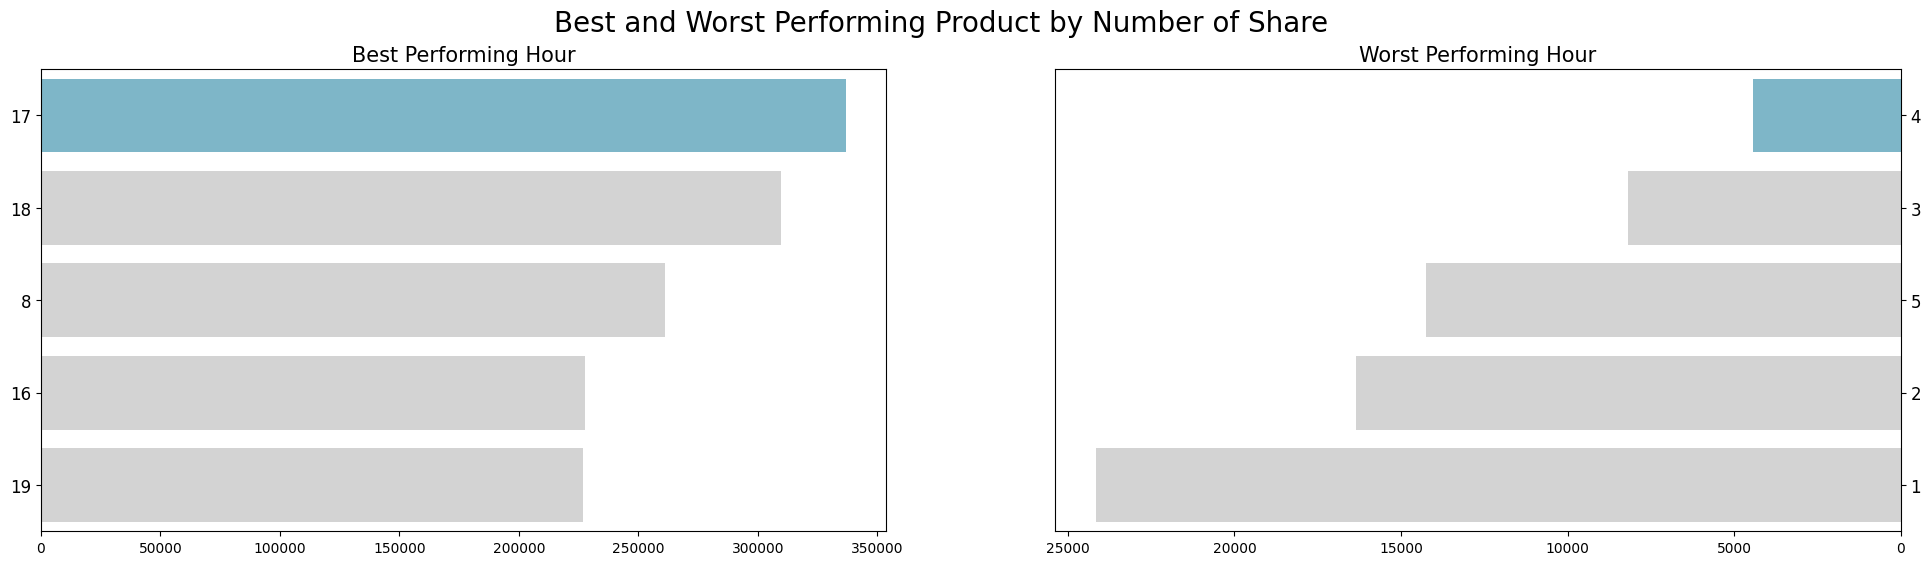

In [62]:
# menampilkan masing-masing 5 nominasi hour ke dalam grafik best dan worst
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="cnt", y="hr", data=sum_sharing_hour_df.head(5), 
    hue="hr", palette=colors, legend=False, ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Hour", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(
    x="cnt", y="hr", 
    data=sum_sharing_hour_df.sort_values(by="cnt", ascending=True).head(5),
    hue="hr", palette=colors, legend=False, ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Hour", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Best and Worst Performing Product by Number of Share", fontsize=20)
plt.show()

### Pertanyaan 3:Bagaimana perbedaan jumlah peminjaman sepeda di setiap musim? Apakah musim tertentu berpengaruh?

**distribusi jumlah data harian berdasarkan musim**

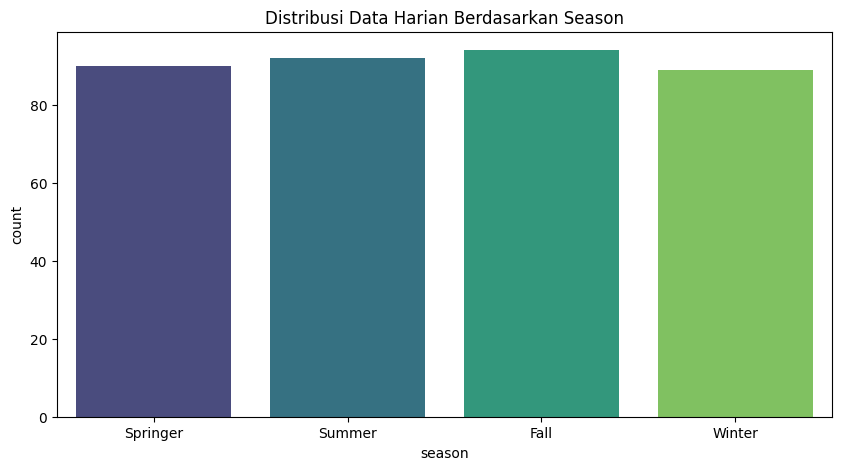

In [63]:
# menganalisa distribusi jumlah data harian berdasarkan musim (season)

# Input tanggal mulai dan selesai
start_date = "2011-1-1"
end_date = "2011-12-31"

# Konversi ke format datetime
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Filter data berdasarkan rentang tanggal
filtered_day_df = day_df[(day_df["dteday"] >= start_date) & (day_df["dteday"] <= end_date)].copy()

plt.figure(figsize=(10,5))
sns.countplot(x='season', data=filtered_day_df, hue='season', palette='viridis')
plt.title("Distribusi Data Harian Berdasarkan Season")
plt.show()

**ranking jumlah peminjam harian berdasarkan musim**

In [64]:
# Input tanggal mulai dan selesai
start_date = "2011-1-1"
end_date = "2012-12-31"

# Konversi ke format datetime
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Filter data berdasarkan rentang tanggal
filtered_day_df = day_df[(day_df["dteday"] >= start_date) & (day_df["dteday"] <= end_date)].copy()

# menganalisa jumlah pengguna berdasarkan musim
sum_sharing_season_df = filtered_day_df.groupby("season").cnt.sum().reset_index()

sum_sharing_season_df = sum_sharing_season_df.sort_values(by="cnt", ascending=False)

sum_sharing_season_df.head()

,season,cnt
0,Fall,1061129
2,Summer,918589
3,Winter,841613
1,Springer,471348


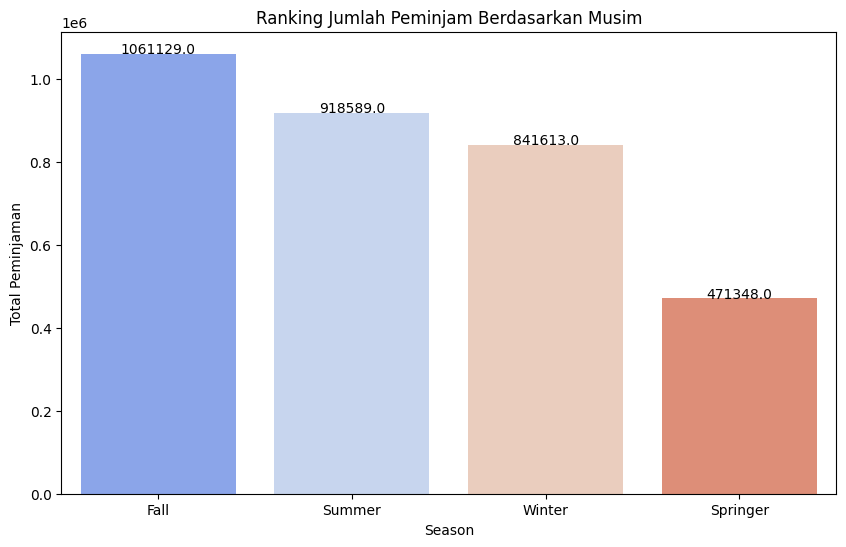

In [65]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='season', y='cnt', data=sum_sharing_season_df, hue='season', palette='coolwarm')

plt.title("Ranking Jumlah Peminjam Berdasarkan Musim")
plt.xlabel("Season")
plt.ylabel("Total Peminjaman")

# Tambahkan label jumlah di atas tiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.4, p.get_height() + 150), ha='center')

plt.show()

### Pertanyaan 4:Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?

**ranking distribusi data berdasarkan cuaca**

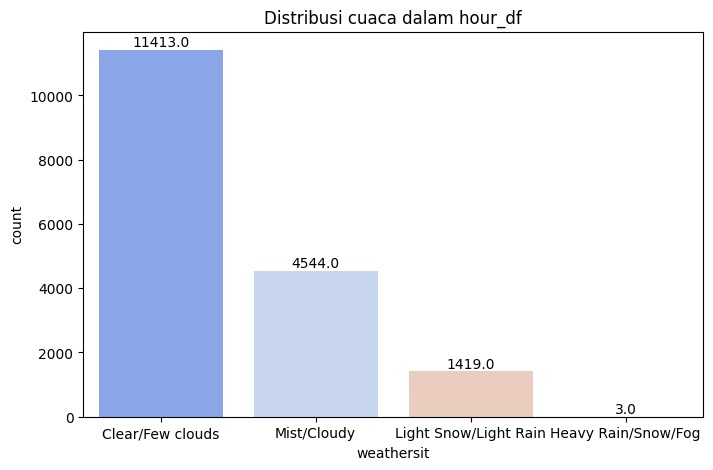

In [66]:
# menganalisa distribusi hour rate berdasarkan cuaca (weathersit)

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='weathersit', data=hour_df, hue='weathersit', palette='coolwarm')
plt.title("Distribusi cuaca dalam hour_df")

# Tambahkan label jumlah di atas tiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.4, p.get_height() + 100), ha='center')

plt.show()


**ranking jumlah peminjam harian berdasarkan cuaca**

In [67]:
# Input tanggal mulai dan selesai
start_date = "2011-1-1"
end_date = "2012-12-31"

# Konversi ke format datetime
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Filter data berdasarkan rentang tanggal
filtered_hour_df = hour_df[(hour_df["dteday"] >= start_date) & (hour_df["dteday"] <= end_date)].copy()

# menganalisa jumlah pengguna berdasarkan cuaca
sum_sharing_weathersit_df = filtered_hour_df.groupby("weathersit").cnt.sum().reset_index()

sum_sharing_weathersit_df = sum_sharing_weathersit_df.sort_values(by="cnt", ascending=False)

sum_sharing_weathersit_df.head()

,weathersit,cnt
0,Clear/Few clouds,2338173
3,Mist/Cloudy,795952
2,Light Snow/Light Rain,158331
1,Heavy Rain/Snow/Fog,223


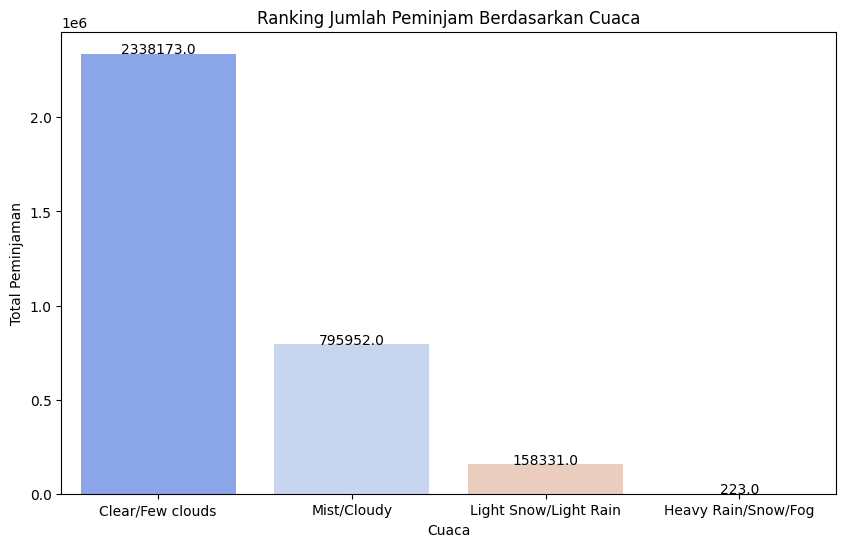

In [68]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='weathersit', y='cnt', data=sum_sharing_weathersit_df, hue='weathersit', palette='coolwarm')

plt.title("Ranking Jumlah Peminjam Berdasarkan Cuaca")
plt.xlabel("Cuaca")
plt.ylabel("Total Peminjaman")

# Tambahkan label jumlah di atas tiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.4, p.get_height() + 150), ha='center')

plt.show()

### Pertanyaan 5: Apakah ada perbedaan pola peminjaman berdasarkan musim dan hari kerja?

**menghitung jumlah berapa kali total peminjam berdasarkan season dan workingday**

In [69]:
season_workingday_df = day_df.groupby(["season", "workingday"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).reset_index()

season_workingday_df.head(10)

,season,workingday,casual,registered,cnt
0,Fall,No,107345,204711,312056
1,Fall,Yes,118746,630327,749073
2,Springer,No,32400,105283,137683
3,Springer,Yes,28222,305443,333665
4,Summer,No,105693,182283,287976
5,Summer,Yes,97829,532784,630613
6,Winter,No,71294,191260,262554
7,Winter,Yes,58488,520571,579059


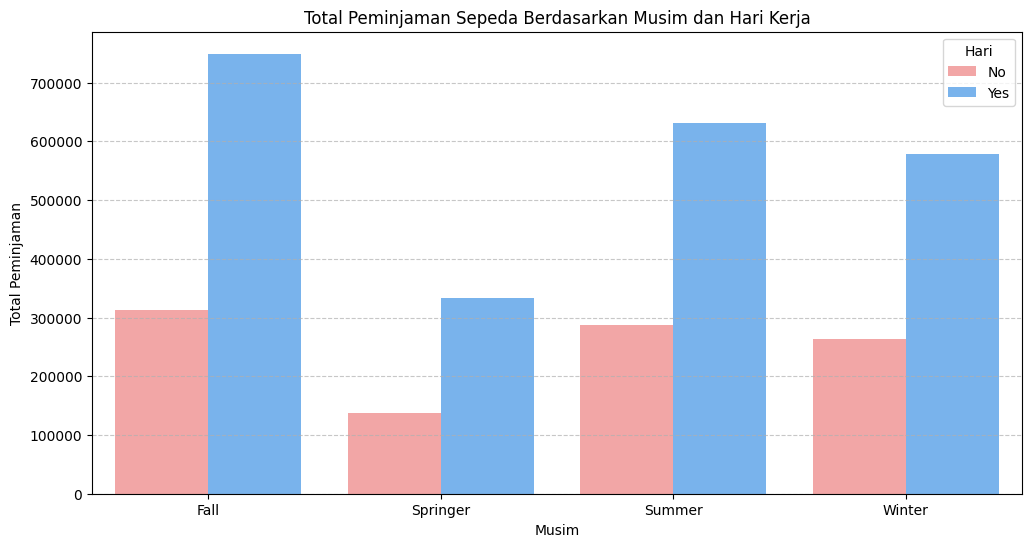

In [70]:
# Membuat bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    x="season", y="cnt", hue="workingday",
    data=season_workingday_df, palette=["#FF9999", "#66B3FF"]
)

# Menambahkan label dan judul
plt.xlabel("Musim")
plt.ylabel("Total Peminjaman")
plt.title("Total Peminjaman Sepeda Berdasarkan Musim dan Hari Kerja")
plt.legend(title="Hari")

plt.grid(axis="y", linestyle="--", alpha=0.7)  # Menambahkan grid agar lebih rapi
plt.show()

### Pertanyaan 6: Bagaimana pola jumlah perbedaan peminjam saat hari libur nasional?

**Menghitung berapa jumlah perbedaan peminjam di hari libur nasional atau bukan**

In [71]:
# Input tanggal mulai dan selesai
start_date = "2012-1-1"
end_date = "2012-12-31"

# Konversi ke format datetime
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Filter data berdasarkan rentang tanggal
filtered_day_df = day_df[(day_df["dteday"] >= start_date) & (day_df["dteday"] <= end_date)].copy()

# menghitung perbedaan jumlah peminjam saat hari libur nasional (holiday)
sum_holiday_df = filtered_day_df.groupby('holiday').agg({
    "instant" : "count", # total hari
    "cnt" : ["sum", "max", "min", "mean"] # analisis total peminjam
})

sum_holiday_df

instant      cnt                         
          count      sum   max   min         mean
holiday                                          
No          355  2001163  8714    22  5637.078873
Yes          11    48413  7403  1013  4401.181818

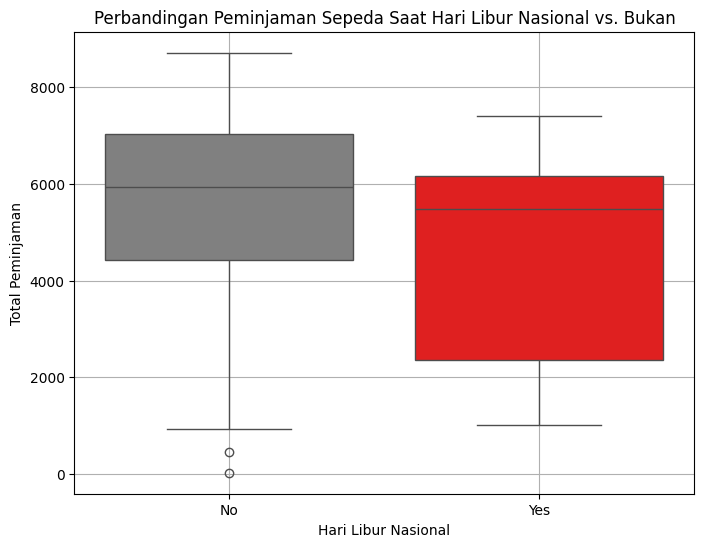

In [75]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="holiday", y="cnt", data=filtered_day_df, hue="holiday", palette=["gray", "red"])
plt.xlabel("Hari Libur Nasional")
plt.ylabel("Total Peminjaman")
plt.title("Perbandingan Peminjaman Sepeda Saat Hari Libur Nasional vs. Bukan")
plt.grid(True)
plt.show()


### Pertanyaan 7: Bagaimana pola peminjaman sepeda berdasarkan interval waktu tertentu (pagi, siang, sore, malam)?

**Menghitung berapa jumlah perbedaan peminjam di waktu tertentu (pagi, siang, sore, malam)**
- Pagi => 05:00-10:00
- Siang => 11:00-15:00
- Sore => 16:00-18:00
- Malam => 19:00-04:00

In [73]:
# Menghitung total peminjam berdasarkan jam
time_category_df = hour_df.copy()

# Fungsi untuk mengelompokkan jam ke dalam kategori waktu
def categorize_time(hour):
    if 5 <= hour <= 10:
        return "Pagi"
    elif 11 <= hour <= 15:
        return "Siang"
    elif 16 <= hour <= 18:
        return "Sore"
    else:
        return "Malam"

# Tambahkan kolom kategori waktu
time_category_df["time_category"] = time_category_df["hr"].apply(categorize_time)

# menghitung perbedaan jumlah peminjam saat waktu tertentu
sum_time_cat_df = time_category_df.groupby('time_category').agg({
    "instant" : "count", # total hari
    "cnt" : ["sum", "max", "min", "mean"] # analisis total peminjam
})

# Tentukan urutan kategori waktu
time_order = ["Pagi", "Siang", "Sore", "Malam"]

# Ubah indeks menjadi kategori terurut
sum_time_cat_df = sum_time_cat_df.reindex(time_order)

sum_time_cat_df


instant     cnt                     
                count     sum  max min        mean
time_category                                     
Pagi             4350  770260  839   1  177.071264
Siang            3642  879454  776   3  241.475563
Sore             2188  874380  977  11  399.625229
Malam            7199  768585  743   1  106.762745

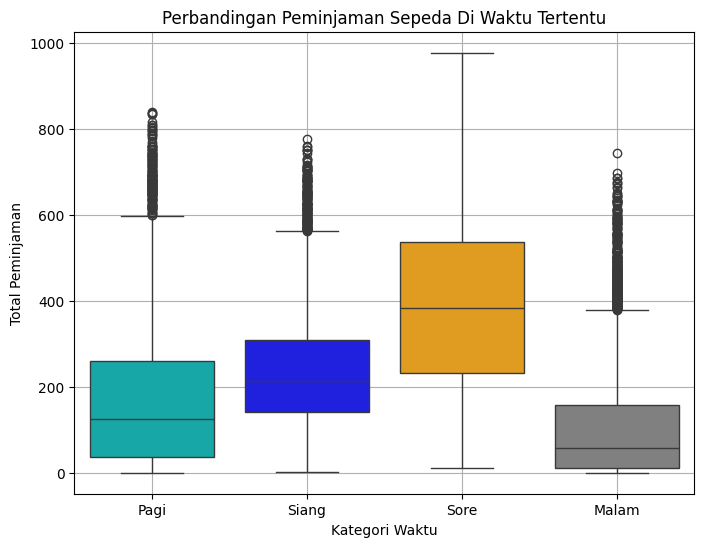

In [74]:
# Tentukan urutan kategori waktu
time_order = ["Pagi", "Siang", "Sore", "Malam"]

# Ubah kolom 'time_category' menjadi kategori terurut
time_category_df["time_category"] = pd.Categorical(
    time_category_df["time_category"], categories=time_order, ordered=True
)

plt.figure(figsize=(8, 6))
sns.boxplot(x="time_category", y="cnt", data=time_category_df, hue="time_category", palette=["c", "b", "orange", "gray"])
plt.xlabel("Kategori Waktu")
plt.ylabel("Total Peminjaman")
plt.title("Perbandingan Peminjaman Sepeda Di Waktu Tertentu")
plt.grid(True)
plt.show()

**Insight:**
1. membuat visual sebaran data, dan juga jumlah perental dalam tanggal/hari, bulan dan tahun menggunakan line chart (untuk perhari) dan bar chart (untuk bulan dan tahun). kemudian melihat bagaimana sebaran jumlah perental yang terdaftar dan tidak.
2. membuat visual pola pengukuran pada jam berapa pengguna paling banyak rental dan paling sedikit menggunakan bar chart horizontal.
3. membuat visual sebaran data menurut musim, serta berapa jumlah perental yang ada di setiap musim menggunakan bar chart.
4. membuat visual jumlah perental berdasarkan 4 cuaca, menggunakan diagram batang dengan angka diatasnya. saya menggunakan data hour
5. membuat visual jumlah perental berdasarkan musim dan apakah merupakan workday atau bukan, dengan menggunakan bar chart.
6. membuat visual jumlah perental disaat hari libur nasional atau bukan menggunakan boxplot
7. membuat visual jumlah perental pada kategori waktu tertentu seperti pagi, siang, sore, atau malam menggunakan boxplot. untuk mengetahui ini, saya menggunakan data hour

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 : sebaran jumlah perental menggunakan linechart menjadi tahu bahwa jumlah perental setiap harinya sangat fluktuatif/tidak menentu, kemudian untuk jumlah perental menggunakan barchart terlihat pada bulan mei sampai oktober adalah yang paling tinggi / puncaknya.
- Conclution pertanyaan 2 : menggunakan barchart horizontal dan 5 sampel tertinggi dan terendah, saya jadi tahu bahwa di list 5 waktu tersebut adalah waktu dengan perental terbanyak maupun yang paling sedikit.
- Conclution pertanyaan 3 : Dengan melihat bar chart jumlah peminjaman berdasarkan musim, terlihat bahwa fall dan summer memiliki jumlah peminjaman tertinggi, sedangkan musim winter dan springer menunjukkan jumlah peminjaman yang lebih rendah.
- Conclution pertanyaan 4 : Dengan menggunakan diagram batang, dapat disimpulkan bahwa kondisi cuaca sangat memengaruhi jumlah peminjaman. Cuaca cerah/sedikit berawan memiliki tingkat peminjaman tertinggi, sedangkan kondisi hujan atau buruk memiliki penurunan jumlah peminjam yang tajam.
- Conclution pertanyaan 5 : Dari visualisasi menggunakan bar chart, dapat terlihat bahwa jumlah perental juga dipengaruhi oleh faktor eksternal seperti musim dan working day (hari kerja). namun ke 4 musim, hari kerja cenderung lebbih banyak perental dari pada weekend.
- Conclution pertanyaan 6 : Dari visual boxplot saat hari libur nasional dan tidak, rentang interkuartil (IQR) dan whisker pada hari libur nasional lebih luas, menunjukkan bahwa jumlah peminjaman pada hari libur memiliki variasi yang lebih besar dibandingkan hari biasa. Namun hari biasa memiliki median yang lebih tinggi sehingga menunjukkan bahwa jumlah perental lebih banyak di hari biasa.
- Conclution pertanyaan 7 : Dari visual boxplot menurut kategori waktu, waktu sore hari menunjukkan jumlah perental lebih banyak dibandingkan waktu waktu lain. waktu terendah adalah di malam hari.